In [1]:
# import relevant libraries
import csv 
import pandas as pd 
import seaborn as sns
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import datasetet
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Exploratory Data Analysis

In [4]:
# Define the columns to retain
retain_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                  'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# Drop all other columns from the train dataset
train # Define the columns to retain
retain_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                  'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                  'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# Drop all other columns from the train dataset
train = train[retain_columns]

# For the test dataset, drop all other columns except the top 10
retain_columns_test = [col for col in retain_columns if col != 'SalePrice']
test = test[retain_columns_test]

# Confirm the new shapes
train.shape, test.shape
train= train[retain_columns]

# For the test dataset, drop all other columns except the top 10
retain_columns_test = [col for col in retain_columns if col != 'SalePrice']
test = test[retain_columns_test]

# Confirm the new shapes
print(f"The shape of the train dataset with the relevant columns {train.shape}\n")
print(f"The shape of the test dataset with the relevant columns {test.shape}\n")


The shape of the train dataset with the relevant columns (1460, 11)

The shape of the test dataset with the relevant columns (1459, 10)



In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
 9   YearRemodAdd  1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB
None


In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.1 KB
None


In [7]:
# Checing and droping columns and missing values
train.isna().sum() # train data has no missing values

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [8]:
# Checing and droping columns and missing values
test.isna().sum() # trest data has missing values

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [9]:
# Fill missing valuesin test data
train['GarageCars'] = train['GarageCars'].fillna(train['GarageCars'].median())
train['GarageArea'] = train['GarageArea'].fillna(train['GarageArea'].median())
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].median())

# preview
print(train.isnull().sum())


OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


In [10]:
#Check for duplicates
duplicate = train.duplicated().sum()

# preciew
print(f"Number of duplicate rows: {duplicate}")# train has no duplicates


Number of duplicate rows: 0


In [11]:
#Check for duplicates
duplicate = test.duplicated().sum()

# preciew
print(f"Number of duplicate rows: {duplicate}")# test has duplicates

Number of duplicate rows: 23


In [12]:
# Drop duplicate rows from the test dataset
test = test.drop_duplicates()

In [13]:
# preview if test still contains duplicates
duplicate = test.duplicated().sum()
duplicate

0

### bivariate analysis for both train train and test data, dropping outliers

In [14]:
## we first check the shape of our dataset to preview if the outliers were dropped later
print(f"The shape of the train dataset is {train.shape}\n")
print(f"The shape of the test dataset is {test.shape}")

The shape of the train dataset is (1460, 11)

The shape of the test dataset is (1436, 10)


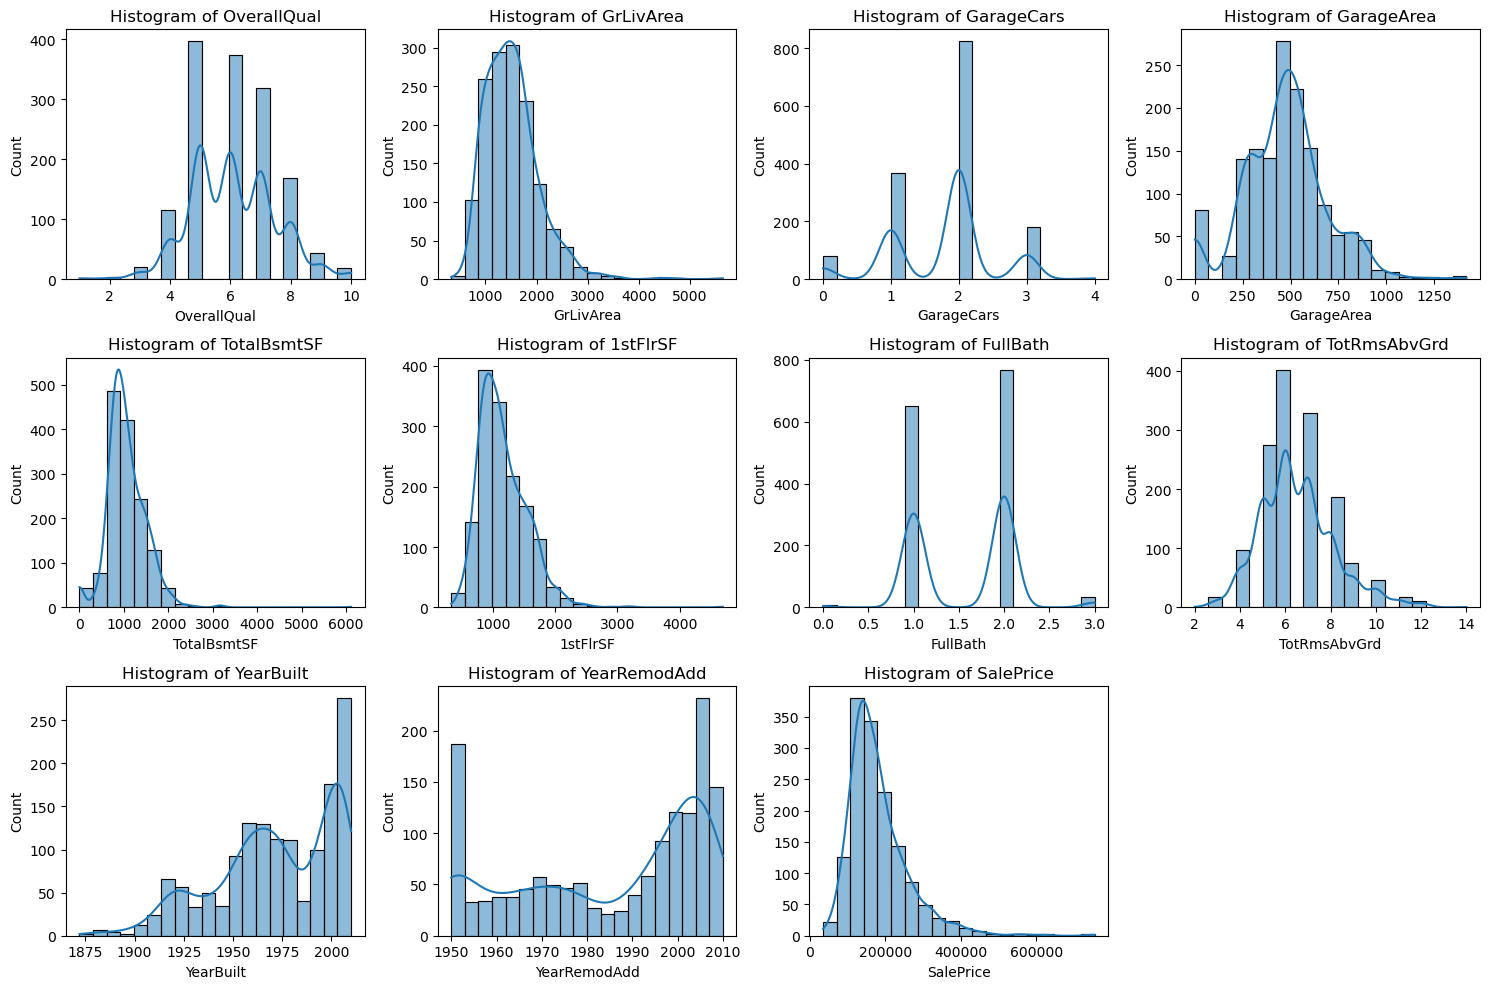

In [15]:
# Train analysis
# Plot histograms for the selected columns
train_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                 'YearBuilt', 'YearRemodAdd', 'SalePrice']

# figsize
plt.figure(figsize=(15, 10))
# Create a histogram for each column
for i, col in enumerate(train_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns
    sns.histplot(train[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [16]:
#dropping outlierrs
# defining a function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# remove train outliers
train_cleaned = remove_outliers(train, train_columns)

# check if the outliers dropped
print(f"Shape of train dataset after dropping outliers: {train_cleaned.shape}")


Shape of train dataset after dropping outliers: (1275, 11)


### Multivariante analysis

### perform multivatiante analysis to train_cleaned dataset

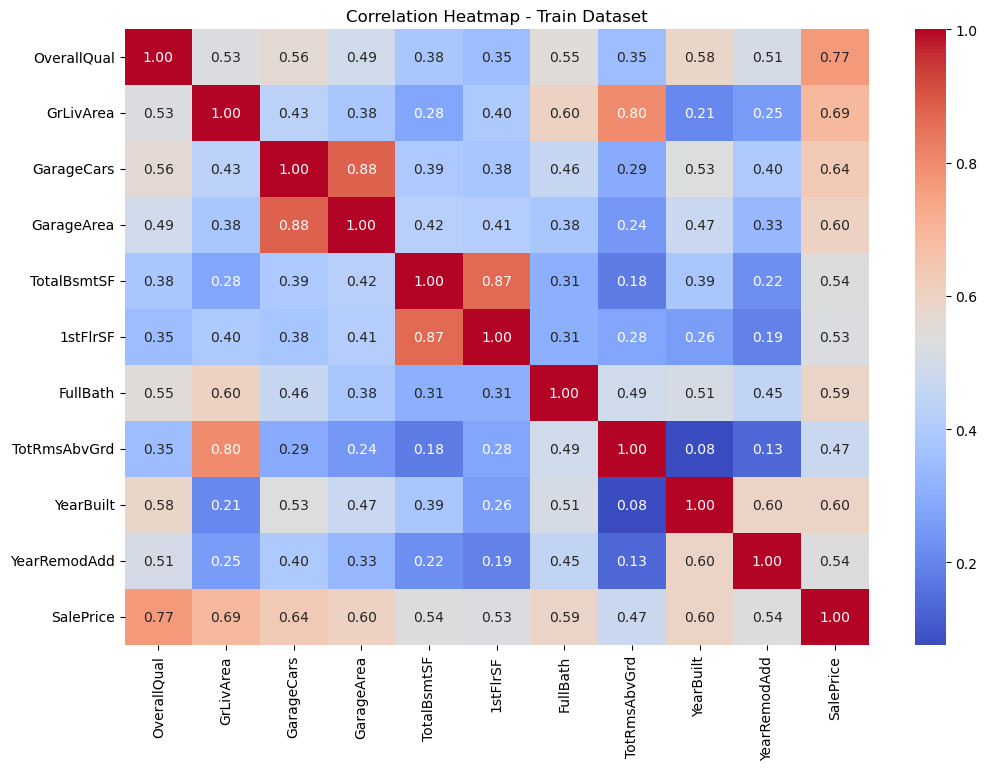

In [17]:
# checking how sales price is correalted to the other variables
# Correlation matrix
corr_matrix = train_cleaned.corr()
# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap - Train Dataset")
plt.show()


## Modelling

### We will create two models linear regression and random forest using random state of 42 and test size of 0.2 in both models

In [18]:
# linear regression  model
# Define X and y
X = train_cleaned.drop(columns=['SalePrice'])
y = train_cleaned['SalePrice']

In [19]:
# addin constant
X = sm.add_constant(X)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Display OLS summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     475.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:52:03   Log-Likelihood:                -11672.
No. Observations:                1020   AIC:                         2.337e+04
Df Residuals:                    1009   BIC:                         2.342e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.274e+06   9.11e+04    -13.989   

In [20]:
# Random forest model

# Define X) and y
X = train_cleaned.drop(columns=['SalePrice'])
y = train_cleaned['SalePrice']

In [21]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# initialize RandomForestRegressor()
model = RandomForestRegressor(n_estimators=100, random_state=42)
# fit model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 24148.20
R² Score: 0.77


The best model is the **linear regression** model with with an ***R_squared of 82.5%*** compared to **random forest** with an R_squared of ***77%***